In [878]:
import numpy as np
import os
import shutil
import pandas as pd
import sys
import gzip
import nibabel as nib
from matplotlib import pyplot as plt
from scipy import stats

## Import Files

In [879]:
path = '/Users/nanatang/VAserversim/m/Researchers/SerenaT/fromjapan_fullruns/'
file = 'grand_PVS_report.csv'


In [880]:
reportfile = os.path.join(path,file)
report = pd.read_csv(reportfile)
report['research group'].unique()
report

,subjects,research group,pvscount,pvsvol,icv norm,pvscountwm,pvsvolwm,icv norm wm,raw,WMH mask
0,ADNI3_114_S_2392y00_i909791,EMCI,2850.0,7825.0,0.005079,1987.0,4381.0,0.002844,no,yes
1,ADNI3_114_S_4404y00_i949873,EMCI,2388.0,6859.0,0.005548,1610.0,3250.0,0.002629,no,yes
2,ADNI3_128_S_4742y00_i1039209,EMCI,2303.0,12018.0,0.007751,1500.0,6803.0,0.004388,no,yes
3,ADNI3_027_S_4919y04_i1398602,EMCI,2634.0,10987.0,0.008034,2047.0,6955.0,0.005086,no,yes
4,ADNI3_067_S_2304y02_i1215232,EMCI,1608.0,6317.0,0.003594,900.0,2724.0,0.001550,no,yes
...,...,...,...,...,...,...,...,...,...,...
2023,ADNI3_941_S_7074y00_i1588331,CN,1509.0,6289.0,0.004356,969.0,2831.0,0.001961,no,yes
2024,ADNI3_941_S_7085y00_i1600180,MCI,1607.0,4441.0,0.003315,954.0,1890.0,0.001411,no,yes
2025,ADNI3_941_S_7051y00_i1553005,CN,2010.0,10314.0,0.006964,1403.0,6060.0,0.004092,no,yes
2026,ADNI3_941_S_7087y00_i1591321,CN,1989.0,7926.0,0.004448,997.0,2721.0,0.001527,no,yes


## Attempt joining of demographics from LONI

In [881]:
demofile = 'idaSearch_2_21_2024-ADNI3.csv'
demo = pd.read_csv(os.path.join(path,demofile))
demo['Visit'][0]
demo

,Subject ID,Phase,Sex,Weight,Research Group,APOE A1,APOE A2,Visit,Study Date,Archive Date,Age,Global CDR,NPI-Q Total Score,MMSE Total Score,GDSCALE Total Score,FAQ Total Score,Modality,Description,Imaging Protocol,Image ID
0,022_S_2379,ADNI 3,M,96.9,EMCI,3.0,3.0,ADNI3 Year 2 Visit,6/5/19,6/6/19,74.1,NaN,NaN,NaN,NaN,NaN,MRI,Accelerated Sagittal MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.0...,1173479
1,082_S_5278,ADNI 3,M,73.0,SMC,3.0,4.0,ADNI3 Year 2 Visit,3/5/20,3/1/21,86.8,NaN,NaN,NaN,NaN,NaN,MRI,Accelerated Sagittal MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.0...,1416036
2,082_S_6629,ADNI 3,F,72.6,CN,NaN,NaN,ADNI3 Year 2 Visit,1/25/22,3/23/22,60.2,NaN,NaN,NaN,NaN,NaN,MRI,Accelerated Sagittal MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.0...,1559412
3,003_S_1122,ADNI 3,F,55.3,MCI,3.0,3.0,ADNI3 Year 1 Visit,12/6/18,12/6/18,88.7,NaN,NaN,NaN,NaN,NaN,MRI,Accelerated Sagittal MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.0...,1083056
4,006_S_6252,ADNI 3,F,81.0,MCI,3.0,4.0,ADNI3 Year 1 Visit,5/6/19,5/7/19,75.8,NaN,NaN,NaN,NaN,NaN,MRI,Axial Field Mapping,Acquisition Plane=AXIAL;Slice Thickness=3.0;Ma...,1162268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11943,941_S_7085,ADNI 3,F,100.2,MCI,NaN,NaN,ADNI Screening,7/1/22,7/1/22,69.7,NaN,NaN,NaN,NaN,NaN,MRI,Field Mapping,Acquisition Plane=AXIAL;Slice Thickness=3.0;Ma...,1600186
11944,941_S_7087,ADNI 3,M,84.4,CN,NaN,NaN,ADNI Screening,6/15/22,6/16/22,66.9,NaN,NaN,NaN,NaN,NaN,MRI,Accelerated Sagittal MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.0...,1591321
11945,941_S_7087,ADNI 3,M,84.4,CN,NaN,NaN,ADNI Screening,6/15/22,6/16/22,66.9,NaN,NaN,NaN,NaN,NaN,MRI,Field Mapping,Acquisition Plane=AXIAL;Slice Thickness=3.0;Ma...,1591327
11946,941_S_7106,ADNI 3,F,77.1,MCI,NaN,NaN,ADNI Screening,9/9/22,9/9/22,71.5,NaN,NaN,NaN,NaN,NaN,MRI,Accelerated Sagittal MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.0...,1619403


In [882]:
# replace 
demo_clean = demo.replace(to_replace=r'ADNI3 Initial Visit-Cont Pt', value='y00', regex=True)
demo_clean = demo_clean.replace(to_replace=r'ADNI Screening', value='y00', regex=True)
demo_clean = demo_clean.replace(to_replace=r'ADNI3 Year 1 Visit', value='y01', regex=True)
demo_clean = demo_clean.replace(to_replace=r'ADNI3 Year 2 Visit', value='y02', regex=True)
demo_clean = demo_clean.replace(to_replace=r'ADNI3 Year 3 Visit', value='y03', regex=True)
demo_clean = demo_clean.replace(to_replace=r'ADNI3 Year 4 Visit', value='y04', regex=True)
demo_clean = demo_clean.replace(to_replace=r'ADNI3 Year 5 Visit', value='y05', regex=True)
demo_clean['Phase'] = demo_clean['Phase'].replace(to_replace=r'ADNI 3', value='ADNI3', regex=True)

# add year, phase, visit and Image ID to subject ID
demo_clean['Subject ID'] = demo_clean['Phase']+ '_' + demo_clean['Subject ID'] + demo_clean['Visit'] + '_i' + demo_clean['Image ID'].apply(str)
demo_clean
#demo_clean['Subject ID'][demo_clean['Subject ID'] == 'ADNI3_003_S_1122y01_i909791']

,Subject ID,Phase,Sex,Weight,Research Group,APOE A1,APOE A2,Visit,Study Date,Archive Date,Age,Global CDR,NPI-Q Total Score,MMSE Total Score,GDSCALE Total Score,FAQ Total Score,Modality,Description,Imaging Protocol,Image ID
0,ADNI3_022_S_2379y02_i1173479,ADNI3,M,96.9,EMCI,3.0,3.0,y02,6/5/19,6/6/19,74.1,NaN,NaN,NaN,NaN,NaN,MRI,Accelerated Sagittal MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.0...,1173479
1,ADNI3_082_S_5278y02_i1416036,ADNI3,M,73.0,SMC,3.0,4.0,y02,3/5/20,3/1/21,86.8,NaN,NaN,NaN,NaN,NaN,MRI,Accelerated Sagittal MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.0...,1416036
2,ADNI3_082_S_6629y02_i1559412,ADNI3,F,72.6,CN,NaN,NaN,y02,1/25/22,3/23/22,60.2,NaN,NaN,NaN,NaN,NaN,MRI,Accelerated Sagittal MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.0...,1559412
3,ADNI3_003_S_1122y01_i1083056,ADNI3,F,55.3,MCI,3.0,3.0,y01,12/6/18,12/6/18,88.7,NaN,NaN,NaN,NaN,NaN,MRI,Accelerated Sagittal MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.0...,1083056
4,ADNI3_006_S_6252y01_i1162268,ADNI3,F,81.0,MCI,3.0,4.0,y01,5/6/19,5/7/19,75.8,NaN,NaN,NaN,NaN,NaN,MRI,Axial Field Mapping,Acquisition Plane=AXIAL;Slice Thickness=3.0;Ma...,1162268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11943,ADNI3_941_S_7085y00_i1600186,ADNI3,F,100.2,MCI,NaN,NaN,y00,7/1/22,7/1/22,69.7,NaN,NaN,NaN,NaN,NaN,MRI,Field Mapping,Acquisition Plane=AXIAL;Slice Thickness=3.0;Ma...,1600186
11944,ADNI3_941_S_7087y00_i1591321,ADNI3,M,84.4,CN,NaN,NaN,y00,6/15/22,6/16/22,66.9,NaN,NaN,NaN,NaN,NaN,MRI,Accelerated Sagittal MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.0...,1591321
11945,ADNI3_941_S_7087y00_i1591327,ADNI3,M,84.4,CN,NaN,NaN,y00,6/15/22,6/16/22,66.9,NaN,NaN,NaN,NaN,NaN,MRI,Field Mapping,Acquisition Plane=AXIAL;Slice Thickness=3.0;Ma...,1591327
11946,ADNI3_941_S_7106y00_i1619403,ADNI3,F,77.1,MCI,NaN,NaN,y00,9/9/22,9/9/22,71.5,NaN,NaN,NaN,NaN,NaN,MRI,Accelerated Sagittal MPRAGE,Acquisition Plane=SAGITTAL;Slice Thickness=1.0...,1619403


In [883]:
# add age, weight, sex columns
# RUNNING THIS CELL MORE THAN ONCE WILL PRODUCE ISSUES

demoonly_clean = pd.DataFrame({'subjects':demo_clean['Subject ID'],'Age':demo_clean['Age'],'Weight':demo_clean['Weight'],'Sex':demo_clean['Sex']})
#report
report = report.merge(demoonly_clean,how='left',on='subjects')
report.drop_duplicates(inplace=True)
report
#report.loc[np.where(report['Sex'].isna())]
# some of these subjects have the wrong image ID or the wrong year labeled
# keeping the report labels because they presumably match the logs in the VA


,subjects,research group,pvscount,pvsvol,icv norm,pvscountwm,pvsvolwm,icv norm wm,raw,WMH mask,Age,Weight,Sex
0,ADNI3_114_S_2392y00_i909791,EMCI,2850.0,7825.0,0.005079,1987.0,4381.0,0.002844,no,yes,70.6,65.8,F
1,ADNI3_114_S_4404y00_i949873,EMCI,2388.0,6859.0,0.005548,1610.0,3250.0,0.002629,no,yes,88.6,79.4,F
2,ADNI3_128_S_4742y00_i1039209,EMCI,2303.0,12018.0,0.007751,1500.0,6803.0,0.004388,no,yes,76.8,49.9,F
3,ADNI3_027_S_4919y04_i1398602,EMCI,2634.0,10987.0,0.008034,2047.0,6955.0,0.005086,no,yes,83.2,83.3,F
4,ADNI3_067_S_2304y02_i1215232,EMCI,1608.0,6317.0,0.003594,900.0,2724.0,0.001550,no,yes,69.8,81.6,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,ADNI3_941_S_7074y00_i1588331,CN,1509.0,6289.0,0.004356,969.0,2831.0,0.001961,no,yes,70.9,80.3,M
2026,ADNI3_941_S_7085y00_i1600180,MCI,1607.0,4441.0,0.003315,954.0,1890.0,0.001411,no,yes,69.7,100.2,F
2027,ADNI3_941_S_7051y00_i1553005,CN,2010.0,10314.0,0.006964,1403.0,6060.0,0.004092,no,yes,63.7,72.6,M
2028,ADNI3_941_S_7087y00_i1591321,CN,1989.0,7926.0,0.004448,997.0,2721.0,0.001527,no,yes,66.9,84.4,M


In [884]:
# fix the entries that have NaNs
report.loc[np.where(report['Age'].isna())]

report.loc[np.where(report['Sex'].isna())]['Weight'] = [96.9,73,72.6,55.3,81]
report.loc[np.where(report['Sex'].isna())]['Age'] = [74.1,86.8,60.2,88.7,75.8]
report.loc[np.where(report['Sex'].isna())]['Sex'] = ['M','M','F','F','F']
report



,subjects,research group,pvscount,pvsvol,icv norm,pvscountwm,pvsvolwm,icv norm wm,raw,WMH mask,Age,Weight,Sex
0,ADNI3_114_S_2392y00_i909791,EMCI,2850.0,7825.0,0.005079,1987.0,4381.0,0.002844,no,yes,70.6,65.8,F
1,ADNI3_114_S_4404y00_i949873,EMCI,2388.0,6859.0,0.005548,1610.0,3250.0,0.002629,no,yes,88.6,79.4,F
2,ADNI3_128_S_4742y00_i1039209,EMCI,2303.0,12018.0,0.007751,1500.0,6803.0,0.004388,no,yes,76.8,49.9,F
3,ADNI3_027_S_4919y04_i1398602,EMCI,2634.0,10987.0,0.008034,2047.0,6955.0,0.005086,no,yes,83.2,83.3,F
4,ADNI3_067_S_2304y02_i1215232,EMCI,1608.0,6317.0,0.003594,900.0,2724.0,0.001550,no,yes,69.8,81.6,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,ADNI3_941_S_7074y00_i1588331,CN,1509.0,6289.0,0.004356,969.0,2831.0,0.001961,no,yes,70.9,80.3,M
2026,ADNI3_941_S_7085y00_i1600180,MCI,1607.0,4441.0,0.003315,954.0,1890.0,0.001411,no,yes,69.7,100.2,F
2027,ADNI3_941_S_7051y00_i1553005,CN,2010.0,10314.0,0.006964,1403.0,6060.0,0.004092,no,yes,63.7,72.6,M
2028,ADNI3_941_S_7087y00_i1591321,CN,1989.0,7926.0,0.004448,997.0,2721.0,0.001527,no,yes,66.9,84.4,M


## Data cleaning

In [885]:
# step 1: fix all MCI labels
report_clean = report.replace(to_replace=r'.*MC.*', value='MCI', regex=True)
report_clean

,subjects,research group,pvscount,pvsvol,icv norm,pvscountwm,pvsvolwm,icv norm wm,raw,WMH mask,Age,Weight,Sex
0,ADNI3_114_S_2392y00_i909791,MCI,2850.0,7825.0,0.005079,1987.0,4381.0,0.002844,no,yes,70.6,65.8,F
1,ADNI3_114_S_4404y00_i949873,MCI,2388.0,6859.0,0.005548,1610.0,3250.0,0.002629,no,yes,88.6,79.4,F
2,ADNI3_128_S_4742y00_i1039209,MCI,2303.0,12018.0,0.007751,1500.0,6803.0,0.004388,no,yes,76.8,49.9,F
3,ADNI3_027_S_4919y04_i1398602,MCI,2634.0,10987.0,0.008034,2047.0,6955.0,0.005086,no,yes,83.2,83.3,F
4,ADNI3_067_S_2304y02_i1215232,MCI,1608.0,6317.0,0.003594,900.0,2724.0,0.001550,no,yes,69.8,81.6,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,ADNI3_941_S_7074y00_i1588331,CN,1509.0,6289.0,0.004356,969.0,2831.0,0.001961,no,yes,70.9,80.3,M
2026,ADNI3_941_S_7085y00_i1600180,MCI,1607.0,4441.0,0.003315,954.0,1890.0,0.001411,no,yes,69.7,100.2,F
2027,ADNI3_941_S_7051y00_i1553005,CN,2010.0,10314.0,0.006964,1403.0,6060.0,0.004092,no,yes,63.7,72.6,M
2028,ADNI3_941_S_7087y00_i1591321,CN,1989.0,7926.0,0.004448,997.0,2721.0,0.001527,no,yes,66.9,84.4,M


In [886]:
# step 2: other cleaning:
# anything that doesn't have WMH mask

nowmh = report_clean[report_clean['WMH mask'] == 'no'].index
report_clean.drop(nowmh,inplace=True)
report_clean

# group by disease stage
grouped = report_clean.groupby(['research group'])
ad = grouped.get_group('AD')
mci = grouped.get_group('MCI')
cn = grouped.get_group('CN')

# remove outliers in each group 3 std deviations on both sides)
cnoutlier = cn[(np.abs(stats.zscore(cn['pvscount'])) > 3) 
               | (np.abs(stats.zscore(cn['pvsvol'])) > 3) 
               | (np.abs(stats.zscore(cn['icv norm'])) > 3)
               | (np.abs(stats.zscore(cn['pvscountwm'])) > 3)
               | (np.abs(stats.zscore(cn['pvsvolwm'])) > 3)
               | (np.abs(stats.zscore(cn['icv norm wm'])) > 3)].index
cn.drop(cnoutlier,inplace=True)

mcioutlier = mci[(np.abs(stats.zscore(mci['pvscount'])) > 3) 
               | (np.abs(stats.zscore(mci['pvsvol'])) > 3) 
               | (np.abs(stats.zscore(mci['icv norm'])) > 3)
               | (np.abs(stats.zscore(mci['pvscountwm'])) > 3)
               | (np.abs(stats.zscore(mci['pvsvolwm'])) > 3)
               | (np.abs(stats.zscore(mci['icv norm wm'])) > 3)].index
mci.drop(mcioutlier,inplace=True)

adoutlier = ad[(np.abs(stats.zscore(ad['pvscount'])) > 3) 
               | (np.abs(stats.zscore(ad['pvsvol'])) > 3) 
               | (np.abs(stats.zscore(ad['icv norm'])) > 3)
               | (np.abs(stats.zscore(ad['pvscountwm'])) > 3)
               | (np.abs(stats.zscore(ad['pvsvolwm'])) > 3)
               | (np.abs(stats.zscore(ad['icv norm wm'])) > 3)].index
ad.drop(adoutlier,inplace=True)


/var/folders/1b/13y0jzbx0r7d3rjhqvq1dwd80000gn/T/ipykernel_1282/1844847644.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cn.drop(cnoutlier,inplace=True)
/var/folders/1b/13y0jzbx0r7d3rjhqvq1dwd80000gn/T/ipykernel_1282/1844847644.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mci.drop(mcioutlier,inplace=True)
/var/folders/1b/13y0jzbx0r7d3rjhqvq1dwd80000gn/T/ipykernel_1282/1844847644.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

## Extract Stats

In [888]:
# step 3: extract global stats in each group (mean, std)
## this is done before the transform

col = ['CN', 'MCI', 'AD']
index = ['# of subjects','mean PVS count', 'std PVS count', 'mean PVS volume', 'std PVS volume', 'mean PVS volume normed', 'std PVS volume normed']

subjcounts = [str(cn.count()[0]),str(mci.count()[0]),str(ad.count()[0])]

mean_PVS_count = [cn['pvscount'].mean(), mci['pvscount'].mean(), ad['pvscount'].mean()]
std_PVS_count = [cn['pvscount'].std(), mci['pvscount'].std(), ad['pvscount'].std()]

mean_PVS_vol = [cn['pvsvol'].mean(), mci['pvsvol'].mean(), ad['pvsvol'].mean()]
std_PVS_vol = [cn['pvsvol'].std(), mci['pvsvol'].std(), ad['pvsvol'].std()]

mean_PVS_icvnorm = [cn['icv norm'].mean(), mci['icv norm'].mean(), ad['icv norm'].mean()]
std_PVS_icvnorm = [cn['icv norm'].std(), mci['icv norm'].std(), ad['icv norm'].std()]

statsall = pd.DataFrame([subjcounts,mean_PVS_count,std_PVS_count,mean_PVS_vol,std_PVS_vol,mean_PVS_icvnorm,std_PVS_icvnorm],index=index,columns=col)
statsall = statsall.style.set_caption('Stats PVS All')

mean_PVS_countwm = [cn['pvscountwm'].mean(), mci['pvscountwm'].mean(), ad['pvscountwm'].mean()]
std_PVS_countwm = [cn['pvscountwm'].std(), mci['pvscountwm'].std(), ad['pvscountwm'].std()]

mean_PVS_volwm = [cn['pvsvolwm'].mean(), mci['pvsvolwm'].mean(), ad['pvsvolwm'].mean()]
std_PVS_volwm = [cn['pvsvolwm'].std(), mci['pvsvolwm'].std(), ad['pvsvolwm'].std()]

mean_PVS_icvnormwm = [cn['icv norm wm'].mean(), mci['icv norm wm'].mean(), ad['icv norm wm'].mean()]
std_PVS_icvnormwm = [cn['icv norm wm'].std(), mci['icv norm wm'].std(), ad['icv norm wm'].std()]

statswm = pd.DataFrame([subjcounts,mean_PVS_countwm,std_PVS_countwm,mean_PVS_volwm,std_PVS_volwm,mean_PVS_icvnormwm,std_PVS_icvnormwm],index=index,columns=col)
statswm = statswm.style.set_caption('Stats PVS WM')

statswm

,CN,MCI,AD
# of subjects,838,853,108
mean PVS count,962.058473,1030.298945,1287.925926
std PVS count,615.609665,715.370782,925.801383
mean PVS volume,3250.572793,3597.671746,4270.731481
std PVS volume,2118.359450,2474.140274,2929.221190
mean PVS volume normed,0.002226,0.002443,0.002968
std PVS volume normed,0.001414,0.001677,0.002060


In [889]:
# step 3.5: same number subject correction

# # same number
# cn_num = cn[0:100]
# mci_num = mci[0:100]
# ad_num = ad

# # else keep the same
cn_num = cn
mci_num = mci
ad_num = ad

In [890]:
# step 4: since the data is not normally distributed (right skewed), we need to log transform it

# playing around with choices: pvscount	pvsvol icv norm	pvscountwm pvsvolwm	icv norm wm

# # transform for most skewed
# cn_txfm = np.log(cn_num['icv norm wm'])
# mci_txfm = np.log(mci_num['icv norm wm'])
# ad_txfm = np.log(ad_num['icv norm wm'])

# # transform for medium skewed
# cn_txfm = np.sqrt(cn_num['icv norm wm'])
# mci_txfm = np.sqrt(mci_num['icv norm wm'])
# ad_txfm = np.sqrt(ad_num['icv norm wm'])

# # no transform
cn_txfm = cn_num['pvscountwm']
mci_txfm = mci_num['pvscountwm']
ad_txfm = ad_num['pvscountwm']

# step 2.6: check that the tranform actually makes it normal - shapiro-wilks test?
## seems like I can't actually get it to be normal

print(stats.shapiro(cn_txfm))
print(stats.shapiro(mci_txfm))
print(stats.shapiro(ad_txfm))

ShapiroResult(statistic=0.9383742809295654, pvalue=3.89679823490056e-18)
ShapiroResult(statistic=0.9355223178863525, pvalue=9.76481233047291e-19)
ShapiroResult(statistic=0.935267448425293, pvalue=5.2811454224865884e-05)


In [891]:
# step 3: Stats (X^2, ANOVA, Ttest, Kruskal-Wallis, Mann-Whitney U)

# ANOVA?
fvalue, apvalue = stats.f_oneway(cn_txfm, mci_txfm, ad_txfm)
print('ANOVA: ' + str(fvalue) + ', ' + str(apvalue))

#ttest?
tvalue, tpvalue = stats.ttest_ind(cn_txfm,ad_txfm)
print('T-test: ' + str(tvalue) + ', ' + str(tpvalue))

#Kruskal?
kvalue, kpvalue = stats.kruskal(cn_txfm, mci_txfm, ad_txfm)
print('Kruskal Wallis: ' + str(kvalue) + ', ' + str(kpvalue))

#MannWhitney?
mvalue, mpvalue = stats.mannwhitneyu(cn_txfm,mci_txfm)
print('Mann-Whitney U: ' + str(mvalue) + ', ' + str(mpvalue))

# bootstrap?



ANOVA: 11.25654574052737, 1.385895858528755e-05
T-test: -4.842837683112939, 1.4951365920631252e-06
Kruskal Wallis: 8.176676976360948, 0.016767069111134188
Mann-Whitney U: 345903.0, 0.2518611539173625


## Plots

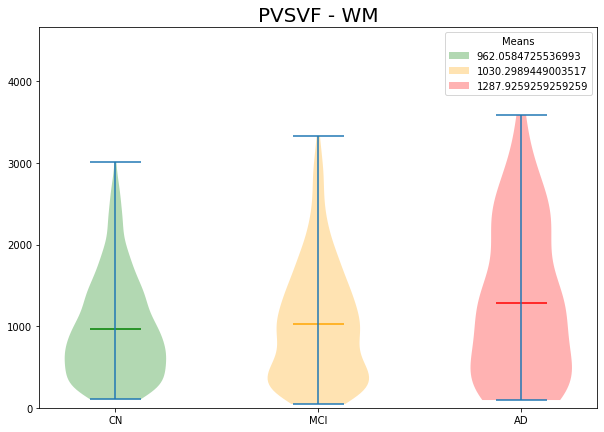

In [892]:
# step 4: plot stuff

#try: https://stackoverflow.com/questions/67376683/can-you-have-a-box-plot-overlap-a-half-violin-plot-on-a-raincloud-plot-using-pyt
#try: https://github.com/pog87/PtitPrince


## combine these different collections into a list
data_to_plot = [cn_txfm, mci_txfm, ad_txfm]

# Create a figure instance
fig = plt.figure(figsize=(10,7))

# Create the boxplot
violin = plt.violinplot(data_to_plot,positions=[1,2,3],showmeans=True,showextrema=True)

# Set the color of the violin patches
colors = ['Green', 'Orange', 'Red']
for pc, color in zip(violin['bodies'], colors):
    pc.set_facecolor(color)
violin['cmeans'].set_colors(colors)
plt.xticks([1, 2, 3], labels=['CN', 'MCI', 'AD'])
plt.legend([np.mean(cn_txfm), np.mean(mci_txfm), np.mean(ad_txfm)],title='Means')
plt.ylim(0,ad_txfm.max()*1.3)
plt.title('PVSVF - WM',fontsize=20)

# y, h, col = max(map(max, data_to_plot)) + 2, 2, 'k'
# plt.text(,y+h, "*", ha='center', va='bottom', color=col)

plt.show()

In [ ]:
# stats comparison giant table
# need to compute: 
    # non transformed & transformed for: pvscount  pvsvol  icv norm  pvscountwm  pvsvolwm  icv norm wm
    # shapiro-wilks test for: pvscount  pvsvol  icv norm  pvscountwm  pvsvolwm  icv norm wm
    # ANOVA, ttest, kruskal wallis, mann whitney u for: cn vs ad, cn vs mci, mci vs ad for each condition above
    # means and std


    
    

In [ ]:
# step n: regional stats (need to come up with a pipeline for this, not straight forward)
# should get: HP, GM / BG, CSO